In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
admission_df = pd.read_csv('Admission_Predict.csv')

In [ ]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admission_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


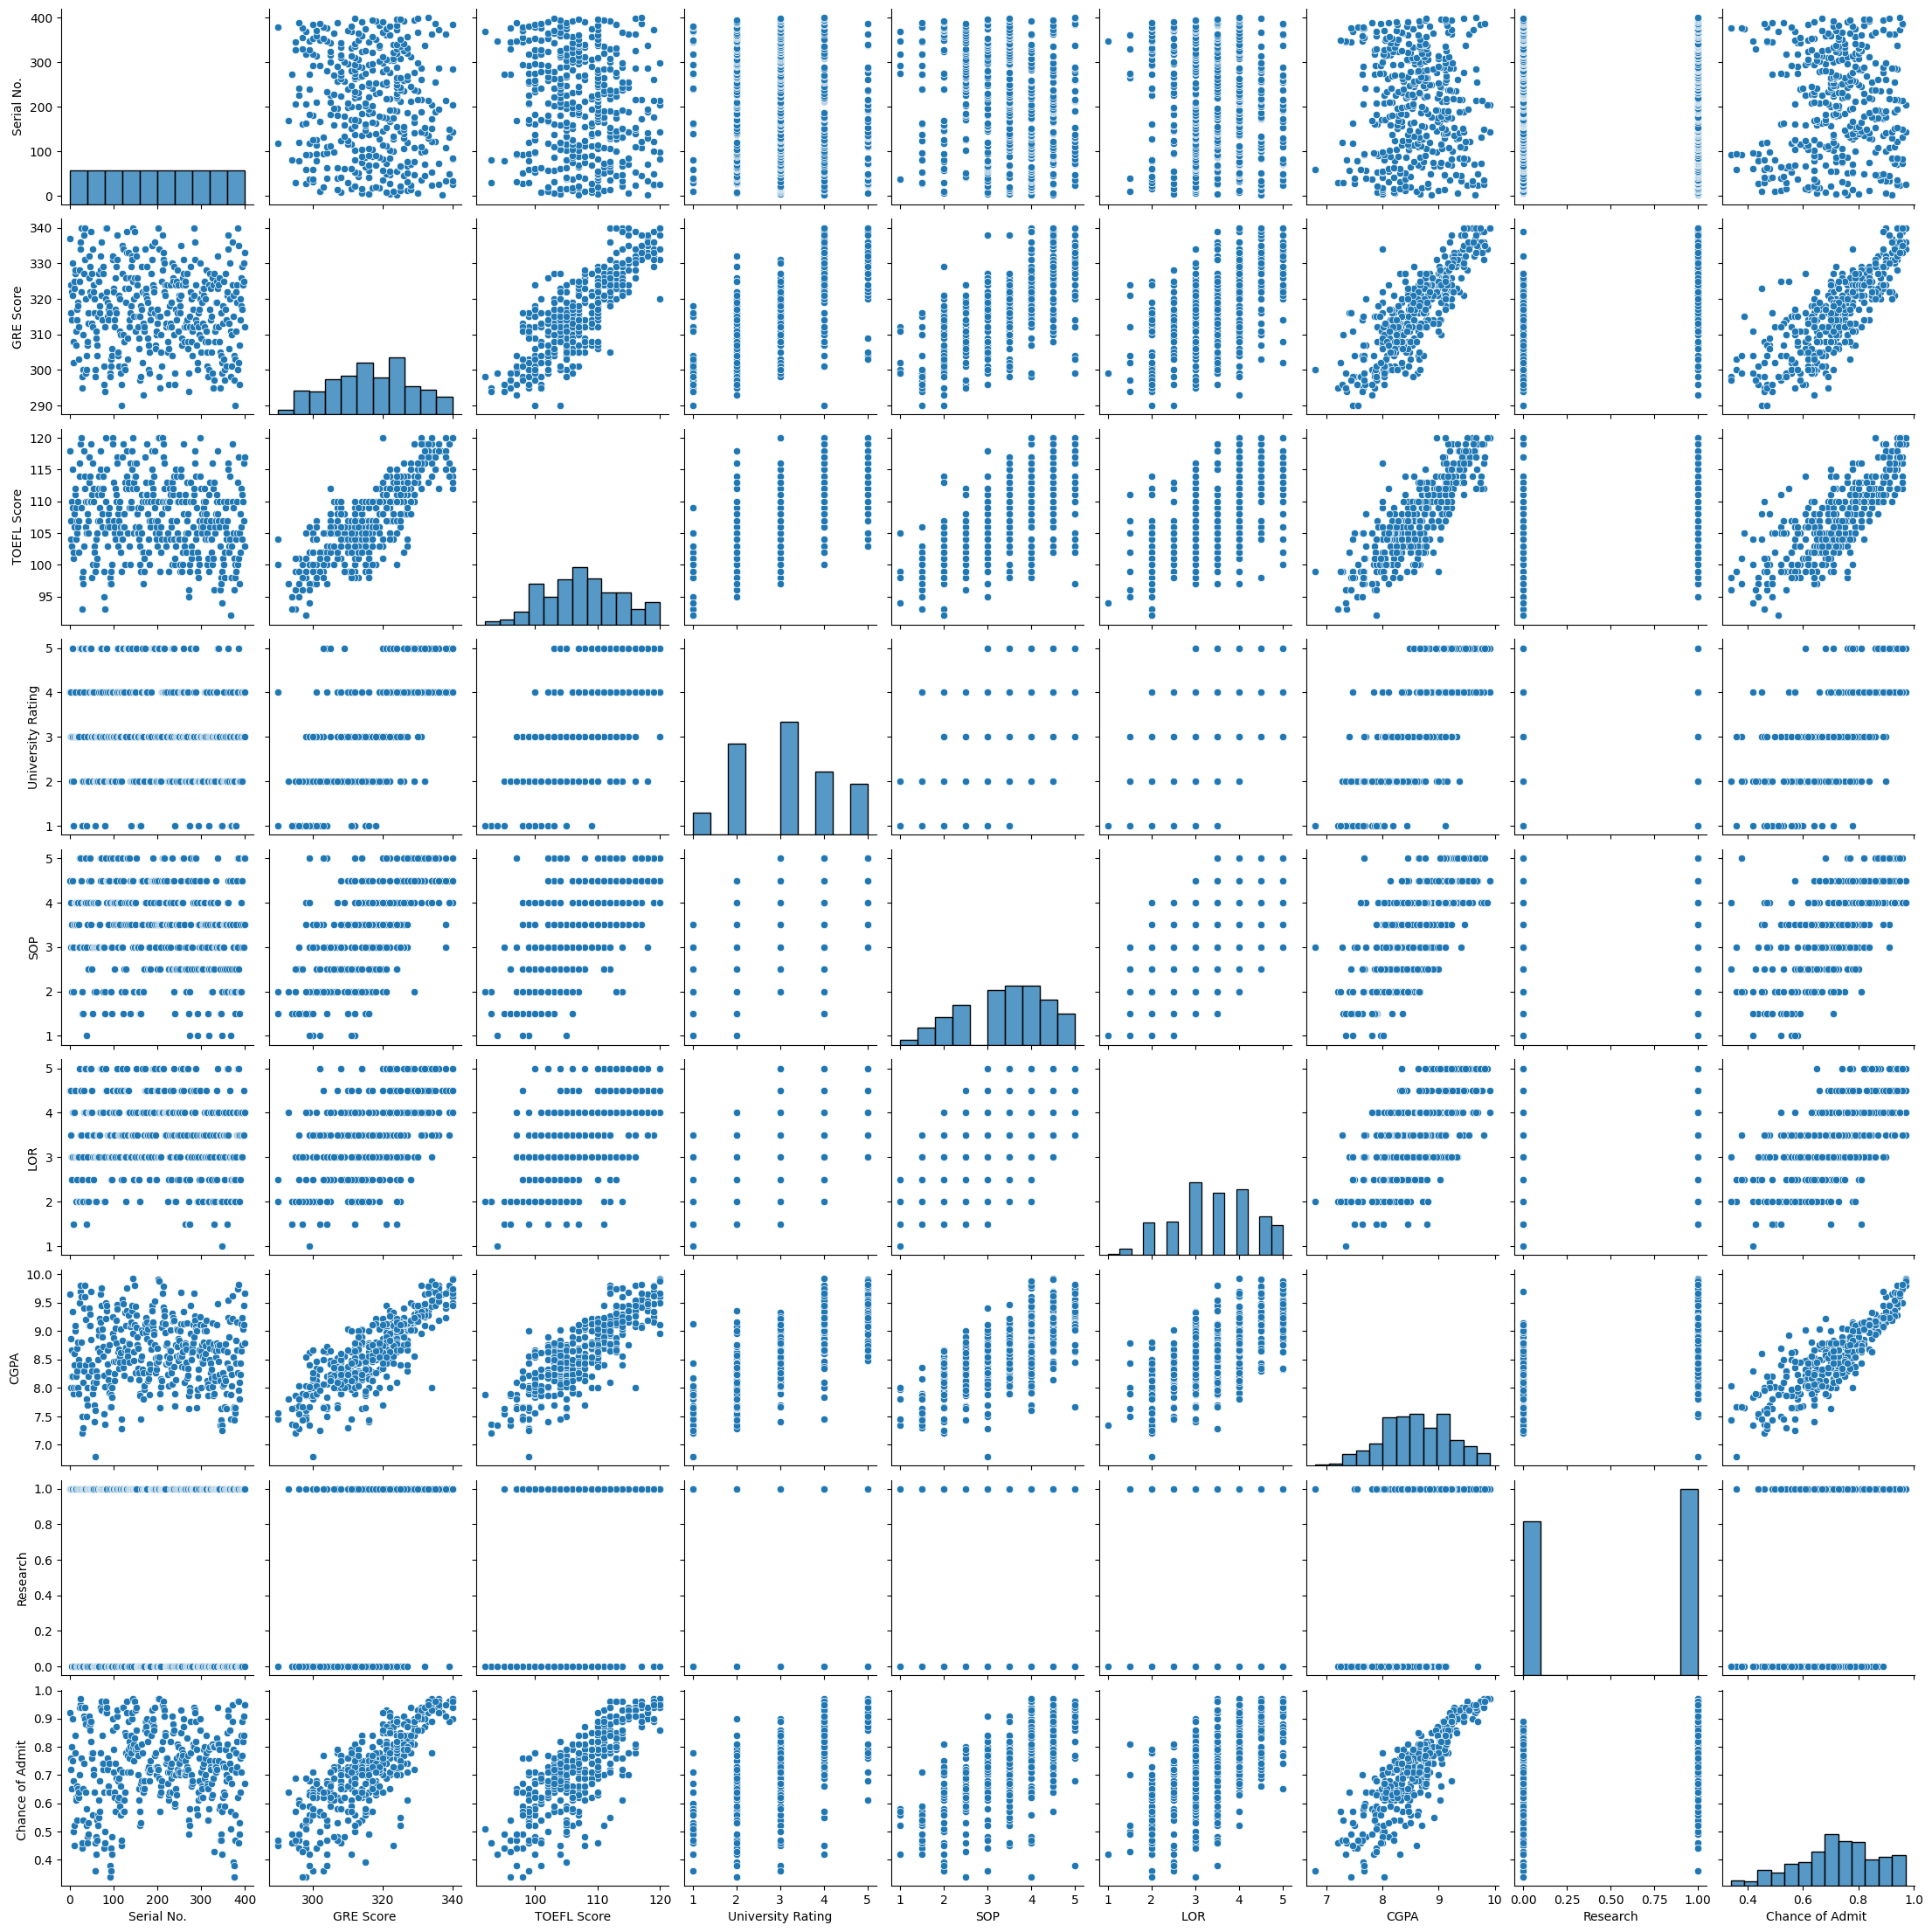

In [ ]:
sns.pairplot(admission_df)

<Axes: >

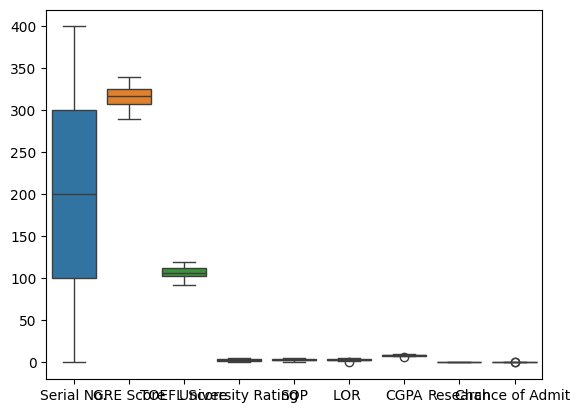

In [ ]:
sns.boxplot(admission_df)

In [11]:
admission_df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [13]:
admission_df.fillna(admission_df.mean(),inplace=True)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale=admission_df.drop(columns=['Chance of Admit ','Serial No.'])
scaled_features=scaler.fit_transform(features_to_scale)
scaled_df=pd.DataFrame(scaled_features, columns=features_to_scale.columns)
processed_df=pd.concat([admission_df['Serial No.'], scaled_df, admission_df['Chance of Admit ']], axis=1)

In [26]:
admission_df.columns = [col.strip() for col in admission_df.columns]
admission_df.rename(columns={"Chance of Admit": "Chance_of_Admit"}, inplace=True)
admission_df['Admitted'] = admission_df['Chance_of_Admit'].apply(lambda x: 1 if x >= 0.75 else 0)
admission_df.drop(columns=["Chance_of_Admit", "Serial No."], inplace=True)
print("Columns:", admission_df.columns.tolist())
print(admission_df.head())

Columns: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admitted']
   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Admitted  
0         1  
1         1  
2         0  
3         1  
4         0  


In [38]:
from sklearn.model_selection import train_test_split
X = admission_df.drop(columns=['Admitted'])
Y = admission_df['Admitted']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = clf.predict(X_test)

In [45]:
print("🔍 Accuracy:", accuracy_score(Y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(Y_test, y_pred))

🔍 Accuracy: 0.8625

📊 Confusion Matrix:
 [[37 10]
 [ 1 32]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87        47
           1       0.76      0.97      0.85        33

    accuracy                           0.86        80
   macro avg       0.87      0.88      0.86        80
weighted avg       0.89      0.86      0.86        80



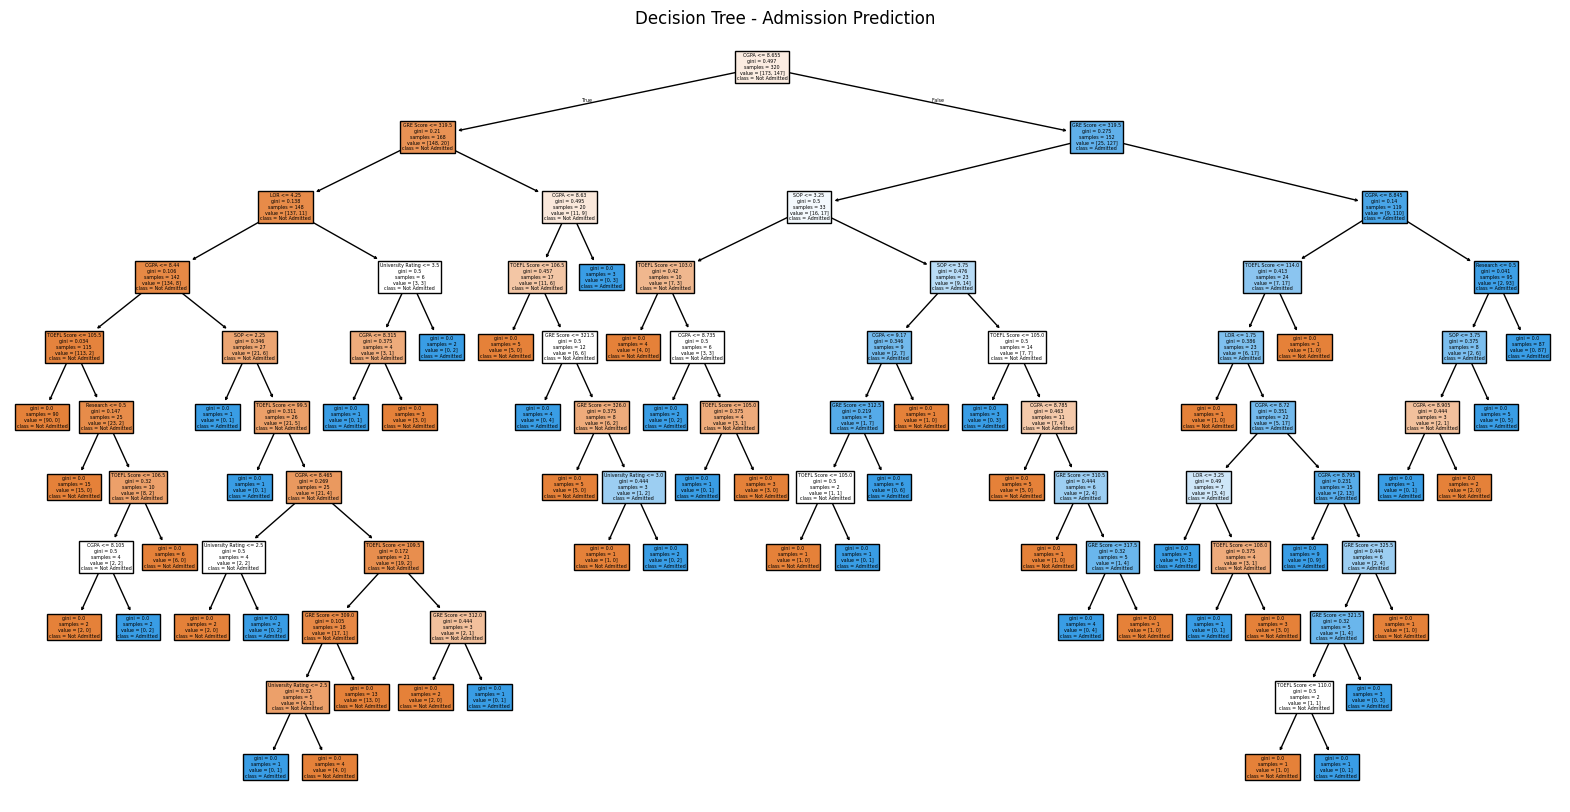

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["Not Admitted", "Admitted"], filled=True)
plt.title("Decision Tree - Admission Prediction")
plt.show()